# An example of kinematic

In [8]:
%pylab inline

from ipywidgets import interact, FloatSlider
import math

Populating the interactive namespace from numpy and matplotlib


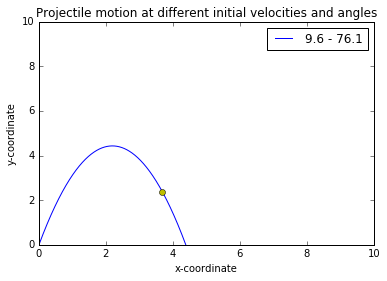

In [35]:
g = 9.8

def draw_graph(x, y):
    plot(x, y)
    xlabel('x-coordinate')
    ylabel('y-coordinate')
    title('Projectile motion at different initial velocities and angles')
    
def draw_markers(x,y):
    plot((x),(y),'o',color='y')
    
def frange(start, final, interval):

    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    
    return numbers

def draw_trajectory(u, theta, t_flight, t_time):
    # list of x and y co-ordinates
    x = []
    y = []
    intervals = frange(0, t_flight, 0.001)
    for t in intervals:
        x.append(u*math.cos(theta)*t)
        y.append(u*math.sin(theta)*t - 0.5*g*t*t)

    #create the graph
    draw_graph(x, y)
    time_step = min(int(t_time/0.001), len(intervals)) -1
    draw_markers(x[time_step], y[time_step])

def new_trajectory(v, theta, at_time):
    #num_trajectories = 3
    velocity = v
    angle = math.radians(float(theta))
    
    t_flight = 2*velocity*math.sin(angle)/g
    S_x = velocity*math.cos(angle)*t_flight
    S_y = velocity*math.sin(angle)*(t_flight/2) - (1/2)*g*(t_flight/2)**2
    draw_trajectory(velocity, angle, t_flight, at_time)

    # Add a legend and show the graph
    legends = []

    legends.append('{0} - {1}'.format(velocity, math.degrees(angle)))
    legend(legends)
    xlim(0, 10)
    ylim(0, 10)
    show()
#new_trajectory()
interact(new_trajectory, 
         v=FloatSlider(min=0.1, max=10.0, step=0.5, value=9.0), 
         theta= FloatSlider(min=0.1, max=90.0, step=0.5, value=45.0),
        at_time=FloatSlider(min=0.1, max=2.0, value=2.0))

